In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import nltk 

In [3]:
#uploading the dataset
df = pd.read_csv('ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
df.shape

(962, 2)

In [7]:
df1 = df
df1.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...


In [8]:
#splitiing dataset into dependent and independent in x and y variables respectively
x = df.iloc[:,1]
y = df.iloc[:,0]

In [9]:
x.head()

0    Skills * Programming Languages: Python (pandas...
1    Education Details \nMay 2013 to May 2017 B.E  ...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Education Details \n MCA   YMCAUST,  Faridabad...
Name: Resume, dtype: object

In [10]:
y.head()

0    Data Science
1    Data Science
2    Data Science
3    Data Science
4    Data Science
Name: Category, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [12]:
len(x_train)  ,  len(x_test,),    len(y_train)   ,    len(y_test)

(644, 318, 644, 318)

In [13]:
training_data = pd.concat([x_train,y_train],axis = 1)
training_data.head()

,Resume,Category
181,Education Details \n B.C.A Bachelor Computer A...,Web Designing
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness
859,"KEY SKILLS: Programing languages: C, C++, Pyth...",Blockchain
69,KEY SKILLS: â¢ Computerized accounting with t...,HR
291,Personal Skills: â¢ Good verbal and written c...,Health and fitness


In [14]:
testing_data = pd.concat([x_test,y_test],axis = 1)
testing_data.head()

,Resume,Category
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer
351,Education Details \nJanuary 2013 Master of Eng...,Java Developer
778,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...",Hadoop
277,Education Details \nJanuary 1992 to January 20...,Health and fitness


In [15]:
training_data['Category'].unique()

array(['Web Designing', 'Health and fitness', 'Blockchain', 'HR', 'Arts',
       'Civil Engineer', 'Java Developer', 'ETL Developer',
       'Data Science', 'Operations Manager', 'Mechanical Engineer',
       'Network Security Engineer', 'Database', 'Electrical Engineering',
       'DevOps Engineer', 'PMO', 'Sales', 'Hadoop', 'DotNet Developer',
       'Automation Testing', 'Testing', 'Python Developer',
       'Business Analyst', 'SAP Developer', 'Advocate'], dtype=object)

In [16]:
training_data['Category'].value_counts()

Java Developer               54
Testing                      43
Web Designing                37
DevOps Engineer              34
Python Developer             32
Hadoop                       32
ETL Developer                31
Blockchain                   28
Data Science                 28
Sales                        28
Mechanical Engineer          27
HR                           26
Arts                         26
Database                     24
Operations Manager           22
PMO                          21
Electrical Engineering       20
Health and fitness           20
Network Security Engineer    19
Automation Testing           19
Business Analyst             19
DotNet Developer             17
SAP Developer                14
Advocate                     13
Civil Engineer               10
Name: Category, dtype: int64

In [17]:
training_data.shape

(644, 2)

In [18]:
training_data['Category'].info()

<class 'pandas.core.series.Series'>
Int64Index: 644 entries, 181 to 102
Series name: Category
Non-Null Count  Dtype 
--------------  ----- 
644 non-null    object
dtypes: object(1)
memory usage: 10.1+ KB


In [19]:
print(len(training_data['Category'].unique()))

25


## EDA

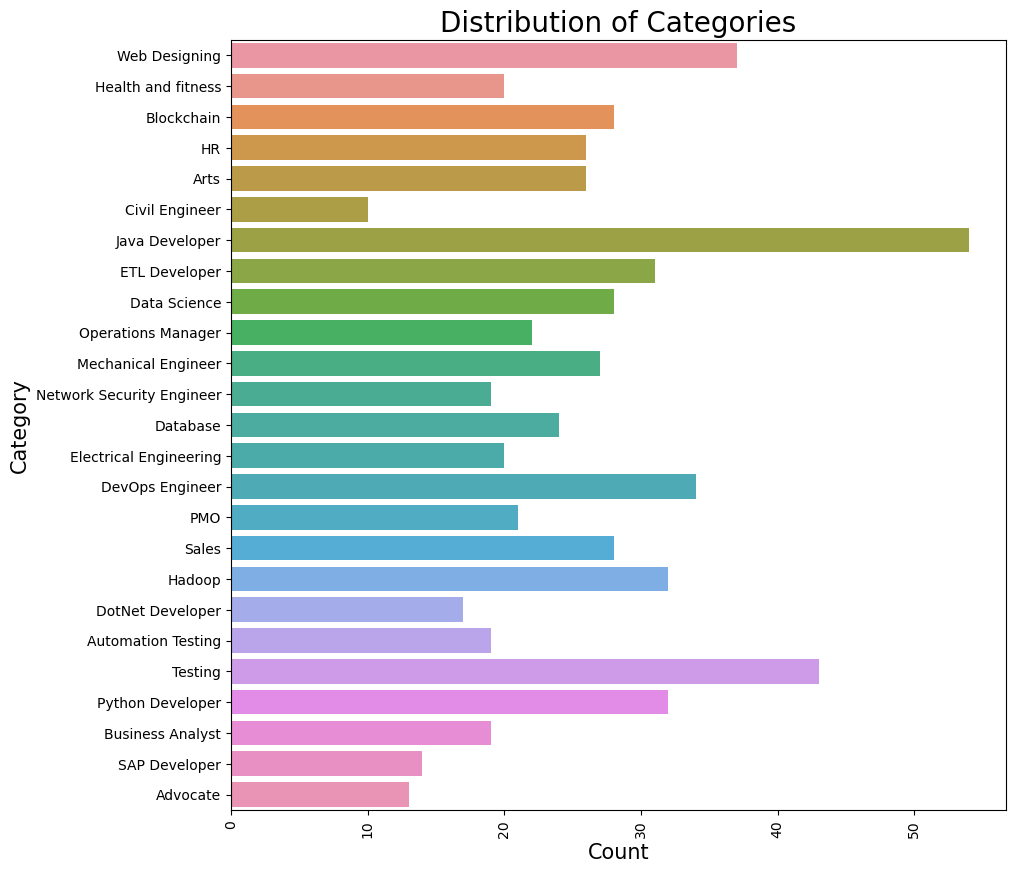

In [20]:
plt.figure(figsize= (10,10))
plt.xticks(rotation = 90)
sns.countplot(y = training_data['Category'])
plt.title("Distribution of Categories", fontsize= 20)
plt.ylabel('Category',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()

<Axes: ylabel='Category'>

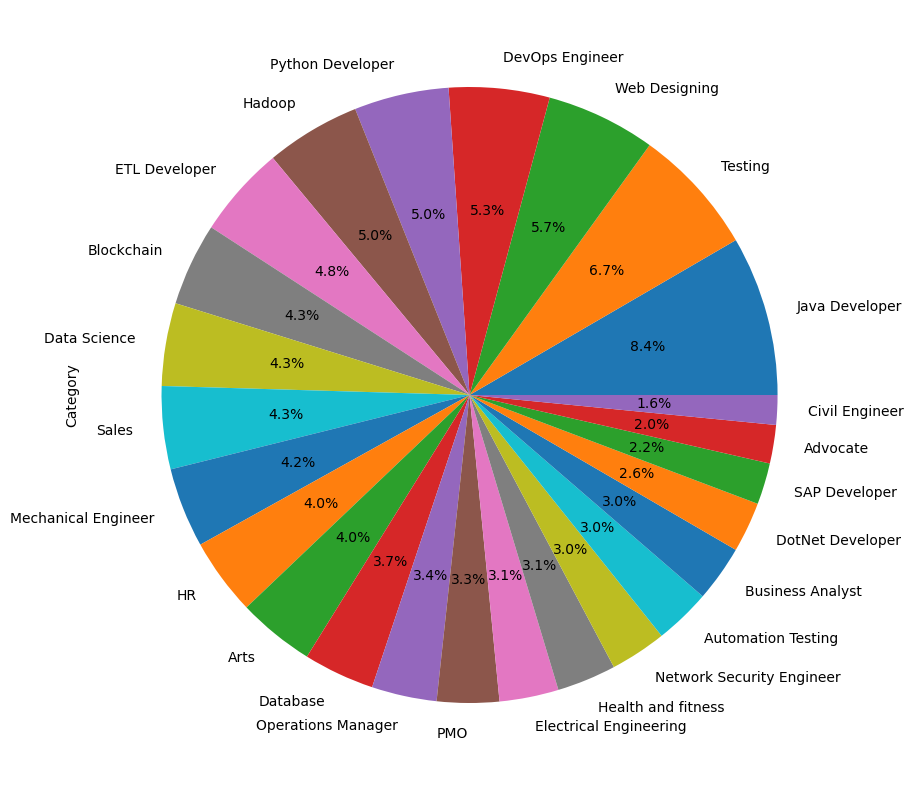

In [21]:
plt.figure(figsize = (10,10))
training_data['Category'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

## Text Preprocessing 
#### text preprocessing on both train and test data 

In [22]:
training_data.head()

,Resume,Category
181,Education Details \n B.C.A Bachelor Computer A...,Web Designing
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness
859,"KEY SKILLS: Programing languages: C, C++, Pyth...",Blockchain
69,KEY SKILLS: â¢ Computerized accounting with t...,HR
291,Personal Skills: â¢ Good verbal and written c...,Health and fitness


In [23]:
training_data["Resume"][181]

'Education Details \n B.C.A Bachelor Computer Application Pune, Maharashtra Pune University\n H.S.C.  Pune, Maharashtra Pune University\n S.S.C.  Pune, Maharashtra Pune University\nWeb Designing and Developer \n\nphp Developer - Exposys Pvt. Ltd\nSkill Details \nCompany Details \ncompany - Exposys Pvt. Ltd\ndescription - Technical Skills\nWeb Development: HTML5, CSS3, Bootstrap, PHP, Ajax, Jquery, JavaScript.\nDatabase: MySQL.\nDevelopment Tools: Notepad++, Sublime Text2.\nFramework: Codeigniter.\nServer: Apache tomcat, Xampp Control Panel.\nOperating Systems: Windows.\ncompany - Exposys Pvt. Ltd\ndescription - Pune.\tAugest 2017 to till date\n\nProject Details:\nProject-I: Pragat Bharat System\nTechnologies Used: HTML, CSS, BOOTSTRAP, PHP, JQUERY, AJAX.\nDatabase Used: My SQL.\nTeam size: 1\nPosition: Software Developer\nSynopsis: This project aim is specially design for people. It is used to collect information to diifernt sector.\n\nProject-II: Go Ayur System\nTechnologies Used: HTM

In [24]:
training_data["Resume"][274]

"SKILLS: Computer: â\x80¢ Can easily operate in Operating System like Windows 10. â\x80¢ Can work in Ms-Office (Word, Excel, and PowerPoint). â\x80¢ Can easily operate internet & Gym Management Software (website & mobile application).Education Details \nJanuary 2010 Advance Diploma in Hotel Management   J&W Institute of Hotel Management\nGym management & Consultant \n\nGym management & Consultant - Sculpt Fitness Centre\nSkill Details \nExcel- Exprience - 96 months\nPowerPoint- Exprience - 96 months\nWord- Exprience - 96 months\nGym Management Software- Exprience - 96 monthsCompany Details \ncompany - Sculpt Fitness Centre\ndescription - 2015 - Present\tSales, Fitness, Operations\ncompany - AB's Fitness Club\ndescription - Fitness, Sales, Administration, Facility & House-keeping\ncompany - AB's Fitness Club\ndescription - Sales, Fitness, Operations\ncompany - Ultimate Fitness Club\ndescription - \ncompany - Tripod Fitness Arena\ndescription - Sales, Administration\ncompany - C K Fitnes

In [25]:
#In Text preprocessing we do---
#revome URls, hastags, mentions, RT\CC, resume text and whitespace with the help of refunction
#change the string into lowercase
# tokenize the string
#remove special character
# remove punctuations marks
# remove stopwords
# apply stemming with the help of nltk library

In [26]:
import re
import string
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stem = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcrid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcrid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def text_preprocess(text):
    text = re.sub('http\S+\s*',' ',text)
    text = re.sub('@\S+',' ',text)
    text = re.sub('#\S+',' ',text)
    text = re.sub('RT/cc',' ',text)
    text = re.sub('\s+',' ',text)
    text = re.sub('[^\x00-\x7f]',r' ',text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(stem.stem(i))
        
    return' '.join(y)

In [28]:
training_data['New_Resume']= training_data["Resume"].apply(text_preprocess)

In [29]:
training_data.head()

,Resume,Category,New_Resume
181,Education Details \n B.C.A Bachelor Computer A...,Web Designing,educ detail bachelor comput applic pune mahara...
274,SKILLS: Computer: â¢ Can easily operate in Op...,Health and fitness,skill comput easili oper oper system like wind...
859,"KEY SKILLS: Programing languages: C, C++, Pyth...",Blockchain,key skill program languag c python apex visual...
69,KEY SKILLS: â¢ Computerized accounting with t...,HR,key skill computer account talli sincer hard w...
291,Personal Skills: â¢ Good verbal and written c...,Health and fitness,person skill good verbal written commun skill ...


In [30]:
#checking data was clear or not 
training_data['New_Resume'][50]

'softwar skill gener comput profici program langag known c java web program tool softwar know matlab dbm key strength poss good commun analyt skill posit think sincer hard work honesti respons enthusiast learn new skill take new task self motiv readi accept challeng educ detail januari 2014 januari 2017 comput scienc engin comput scienc engin adichunchanagiri institut technolog chikmagalur hr skill detail databas manag exprienc 6 month exprienc 6 month exprienc 6 month exprienc 6 monthscompani detail compani truli descript jayashre h'

In [31]:
training_data['New_Resume'][581]

'technic skill respons hand experi product mainten project experi handl project agil methodolog experi handl project sdlc involv stage softwar develop life cycl respons gather requir custom interact provid estim solut document per process fs ts code utp utr ptf sow submiss custom strong knowledg debug test base python work chang control respons promot chang develop uat live environ pivot cloud foundri good commun skill inter person skill hardwork result orient individu team certif train complet intern python train complet intern python web crawl train complet intern python web scrape train complet intern python data scienc train complet intern mongodb train complet intern mysql train complet intern postgresql train complet intern django train complet intern angular 6 html css train complet german a1 level prepar a2 complet intern core java train complet ibm seri train cours mapl institut pune complet intern movex erp train techn complet intern m3 erp train techn java complet intern str

In [32]:
#Now removing Resume column from training_data 
training_data = training_data.drop(['Resume'],axis = 1)
training_data.head()

,Category,New_Resume
181,Web Designing,educ detail bachelor comput applic pune mahara...
274,Health and fitness,skill comput easili oper oper system like wind...
859,Blockchain,key skill program languag c python apex visual...
69,HR,key skill computer account talli sincer hard w...
291,Health and fitness,person skill good verbal written commun skill ...


In [33]:
#text preprocessing on test data also to clear the data 
testing_data.head()

,Resume,Category
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer
351,Education Details \nJanuary 2013 Master of Eng...,Java Developer
778,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...",Hadoop
277,Education Details \nJanuary 1992 to January 20...,Health and fitness


In [34]:
testing_data.shape

(318, 2)

In [35]:
testing_data['New_Resume'] = testing_data['Resume'].apply(text_preprocess)  #applying function 

In [36]:
testing_data.head()

,Resume,Category,New_Resume
344,TECHNICAL SKILLS Programming Languages: Java (...,Java Developer,technic skill program languag java servlet jsp...
381,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Education Details \nJanuary 2013 Master of Eng...,Java Developer,educ detail januari 2013 master engin inform t...
778,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo...",Hadoop,skill set hadoop map reduc hdf hive sqoop java...
277,Education Details \nJanuary 1992 to January 20...,Health and fitness,educ detail januari 1992 januari 2003 first ye...


In [37]:
#now removing Resume column from test data aslo 
testing_data = testing_data.drop(['Resume'],axis = 1)
testing_data.head()

,Category,New_Resume
344,Java Developer,technic skill program languag java servlet jsp...
381,Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Java Developer,educ detail januari 2013 master engin inform t...
778,Hadoop,skill set hadoop map reduc hdf hive sqoop java...
277,Health and fitness,educ detail januari 1992 januari 2003 first ye...


### Converting Target variable into numbers using label encoder using label encoding for training and test data 

In [38]:
training_data.head(3)

,Category,New_Resume
181,Web Designing,educ detail bachelor comput applic pune mahara...
274,Health and fitness,skill comput easili oper oper system like wind...
859,Blockchain,key skill program languag c python apex visual...


In [39]:
training_data['Category'].unique()

array(['Web Designing', 'Health and fitness', 'Blockchain', 'HR', 'Arts',
       'Civil Engineer', 'Java Developer', 'ETL Developer',
       'Data Science', 'Operations Manager', 'Mechanical Engineer',
       'Network Security Engineer', 'Database', 'Electrical Engineering',
       'DevOps Engineer', 'PMO', 'Sales', 'Hadoop', 'DotNet Developer',
       'Automation Testing', 'Testing', 'Python Developer',
       'Business Analyst', 'SAP Developer', 'Advocate'], dtype=object)

In [40]:
training_data['Category'].nunique()

25

In [41]:
#converting training data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data['Category'] = le.fit_transform(training_data['Category'])

In [42]:
training_data.head()

,Category,New_Resume
181,24,educ detail bachelor comput applic pune mahara...
274,14,skill comput easili oper oper system like wind...
859,3,key skill program languag c python apex visual...
69,12,key skill computer account talli sincer hard w...
291,14,person skill good verbal written commun skill ...


In [43]:
training_data['Category'].unique()

array([24, 14,  3, 12,  1,  5, 15, 10,  6, 18, 16, 17,  7, 11,  8, 19, 22,
       13,  9,  2, 23, 20,  4, 21,  0])

In [44]:
#Now converting test data 
testing_data.head(3)

,Category,New_Resume
344,Java Developer,technic skill program languag java servlet jsp...
381,Java Developer,technicalskil springmvc hibern jdbc java j2ee ...
351,Java Developer,educ detail januari 2013 master engin inform t...


In [45]:
testing_data['Category'] = le.transform(testing_data['Category'])

In [46]:
testing_data.head()

,Category,New_Resume
344,15,technic skill program languag java servlet jsp...
381,15,technicalskil springmvc hibern jdbc java j2ee ...
351,15,educ detail januari 2013 master engin inform t...
778,13,skill set hadoop map reduc hdf hive sqoop java...
277,14,educ detail januari 1992 januari 2003 first ye...


In [47]:
testing_data['Category'].nunique()

25

### Converting independent variable 'New Resume' into numbers for test and train data using vectorizer

In [48]:
training_data.head(3)

,Category,New_Resume
181,24,educ detail bachelor comput applic pune mahara...
274,14,skill comput easili oper oper system like wind...
859,3,key skill program languag c python apex visual...


In [49]:
#converting train data into numbers 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_final = cv.fit_transform(training_data['New_Resume']).toarray()

In [50]:
X_train_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
X_train_final.shape

(644, 5181)

In [52]:
testing_data.head(3)

,Category,New_Resume
344,15,technic skill program languag java servlet jsp...
381,15,technicalskil springmvc hibern jdbc java j2ee ...
351,15,educ detail januari 2013 master engin inform t...


In [53]:
X_test_final = cv.transform(testing_data['New_Resume']).toarray()

In [54]:
X_test_final.shape

(318, 5181)

In [55]:
y_final = training_data['Category']   #converting into seriers 

In [56]:
y_final

181    24
274    14
859     3
69     12
291    14
       ..
106     1
270    14
860     3
435    21
102     0
Name: Category, Length: 644, dtype: int32

In [57]:
#seperating y_train 
y_train_final = training_data['Category'].values  #converting into array and saving in y_train_final

In [58]:
y_train_final.shape

(644,)

In [59]:
y_final.shape

(644,)

In [60]:
y_final_1 = np.array(y_final)   #converting from series to array formaat 

In [61]:
y_final_1.shape

(644,)

In [62]:
#seperating y_test
y_test_final = testing_data['Category'].values

In [63]:
y_test_final.shape

(318,)

In [64]:
X_train_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
X_test_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
#Naive Bayes algorithm before data balancing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
ml = MultinomialNB()
ml.fit(X_train_final,y_train_final)

MultinomialNB()

In [67]:
ml.score(X_train_final,y_train_final)

0.9984472049689441

In [68]:
ml.score(X_test_final,y_test_final)

0.9874213836477987

## Balancing the data

### 1] Downsampling

In [69]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1, n_neighbors = 3)

X_train_res,y_train_res = nm.fit_resample(X_train_final,y_train_final)
X_test_res,y_test_res = nm.fit_resample(X_test_final,y_test_final)

In [70]:
ml.score(X_train_res,y_train_res)

0.996

In [71]:
ml.score(X_test_res,y_test_res)

0.9733333333333334

### 2] Upsampling

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_up,y_train_up = sm.fit_resample(X_train_final,y_train_final)
X_test_up,y_test_up = nm.fit_resample(X_test_final,y_test_final)

In [73]:
ml.score(X_train_up,y_train_up)

0.9866666666666667

In [74]:
ml.score(X_test_up,y_test_up)

0.9733333333333334

### Here is conclude that upsampling and downsampling is not effective so , we go without resampling to train the model 

In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [76]:
def LR(X_train_final,y_train_final,X_test_final,y_test_final):
    lg = LogisticRegression()
    lg.fit(X_train_final,y_train_final)
    print('Training accuracy score :{} '.format(lg.score(X_train_final,y_train_final)))
    print('Testing accuracy score :{} '.format(lg.score(X_test_final,y_test_final)))
    print()
    
    y_train_pred = lg.predict(X_train_final)
    y_test_pred = lg.predict(X_test_final)
    
    print('----Classification Report -------')
    print('\nTrain =\n ', classification_report(y_train_final,y_train_pred))
    print('\nTest =\n ', classification_report(y_test_final,y_test_pred))

In [77]:
def NB(X_train_final,y_train_final,X_test_final,y_test_final):
    nb = MultinomialNB()
    nb.fit(X_train_final,y_train_final)
    print("Train Accuracy_score = {} ".format(nb.score(X_train_final,y_train_final)))
    print("Test Accuracy_score = {} ".format(nb.score(X_test_final,y_test_final)))
    print()
    
    y_train_pred = nb.predict(X_train_final)
    y_test_pred = nb.predict(X_test_final)
   
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_final , y_train_pred))
    print("Test = ",classification_report(y_test_final , y_test_pred))

In [78]:
def KNN(X_train_final,y_train_final,X_test_final,y_test_final):
    knn = KNeighborsClassifier()
    knn.fit(X_train_final,y_train_final)
    print("Train Accuracy_score = {} ".format(knn.score(X_train_final,y_train_final)))
    print("Test Accuracy_score = {} ".format(knn.score(X_test_final,y_test_final)))
    print()
    
    y_train_pred = knn.predict(X_train_final)
    y_test_pred = knn.predict(X_test_final)
    
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_final , y_train_pred))
    print("Test = ",classification_report(y_test_final , y_test_pred))

In [79]:
def DT(X_train_final,y_train_final,X_test_final,y_test_final):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_final,y_train_final)
    print("Train Accuracy_score = {} ".format(dt.score(X_train_final,y_train_final)))
    print("Test Accuracy_score = {} ".format(dt.score(X_test_final,y_test_final)))
    print()
   
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_final)
  
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_final , y_train_pred))
    print("Test = ",classification_report(y_test_final , y_test_pred))
  

In [80]:
def RF(X_train_final,y_train_final,X_test_final,y_test_final):
    rf = RandomForestClassifier()
    rf.fit(X_train_final,y_train_final)
    print("Train Accuracy_score = {} ".format(rf.score(X_train_final,y_train_final)))
    print("Test Accuracy_score = {} ".format(rf.score(X_test_final,y_test_final)))
    print()
   
    y_train_pred = rf.predict(X_train_final)
    y_test_pred = rf.predict(X_test_final)
  
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_final , y_train_pred))
    print("Test = ",classification_report(y_test_final , y_test_pred))

In [81]:
def SVM(X_train_final,y_train_final,X_test_final,y_test_final):
    svm = SVC(kernel = 'rbf',C= 1.0)
    svm.fit(X_train_final,y_train_final)
    print("Train Accuracy_score = {} ".format(svm.score(X_train_final,y_train_final)))
    print("Test Accuracy_score = {} ".format(svm.score(X_test_final,y_test_final)))
    print()
  
    y_train_pred = svm.predict(X_train_final)
    y_test_pred = svm.predict(X_test_final)
    
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_final , y_train_pred))
    print("Test = ",classification_report(y_test_final , y_test_pred))

In [82]:
def checking(X_train_final,y_train_final,X_test_final,y_test_final):
    print('*'*100)
    print('Logistic Regression')
    LR(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)
    print('Naive Bayes')
    NB(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)
    print('K-Nearest Neighbors')
    KNN(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)
    print('Decision Tree')
    DT(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)
    print('Random Forest')
    RF(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)
    print('SVM')
    SVM(X_train_final,y_train_final,X_test_final,y_test_final)
    print('*'*100)

In [83]:
checking(X_train_final,y_train_final,X_test_final,y_test_final)

****************************************************************************************************
Logistic Regression


C:\Users\pcrid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy score :1.0 
Testing accuracy score :0.9905660377358491 

----Classification Report -------

Train =
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        20
          15   

Train Accuracy_score = 1.0 
Test Accuracy_score = 1.0 

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        20
          15       1.00      1.00   

In [84]:
dt = DecisionTreeClassifier()
dt.fit(X_train_final,y_train_final)
print("Train Accuracy_score = {} ".format(dt.score(X_train_final,y_train_final)))
print("Test Accuracy_score = {} ".format(dt.score(X_test_final,y_test_final)))
print()
   
y_train_pred = dt.predict(X_train_final)
y_test_pred = dt.predict(X_test_final)
  
print('----Classification Report -------')
print('Train = ',classification_report(y_train_final , y_train_pred))
print("Test = ",classification_report(y_test_final , y_test_pred))   

Train Accuracy_score = 1.0 
Test Accuracy_score = 1.0 

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        20
          15       1.00      1.00   

In [85]:
pro=list(le.classes_)                #extract classes
pro

['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

## to test the model we taking some example for prediction 

In [86]:
def prediction(sentence):
    
    cs = []   #creating a empty list
    profiles = list(le.classes_)   #extract job profile name
    clean_sentence = text_preprocess(sentence)  #call the textpreprocess function for cleaning the text and store into the new variable
    cs.append(clean_sentence)      #append the cleaning data into empty list
    s = cv.transform(cs)    #convert it into vector
    s = s.toarray()             #convert it into numpy array
    num = dt.predict(s)[0]         #use model for prediction
    return profiles[num]    


In [99]:
n = ["Skills • Python • Tableau • Data Visualization • R Studio • Machine Learning • Statistics (IABAC Certified Data Scientist)"
      "• Experience: 1+ years in managing business, data science consulting, and leading innovation projects."
      "• Strong advocate of augmented era, bringing business concepts in machine learning, AI, robotics, etc., to real-world solutions."
      "Education Details: January 2017, B. Tech Computer Science & Engineering, Mohali, Punjab, Indo Global College of Engineering"
      "Work Experience:"
      "• Data Science Consultant - Datamites (13 months)"
      "• Data Science Consultant - Heretic Solutions Pvt Ltd (24 months)"
      "Skills Summary:"
      "• Machine Learning (24 months)"
      "• Python (24 months)"
      "• Solutions (24 months)"
      "• Data Science (24 months)"
      "• Data Visualization (24 months)"
      "• Tableau (24 months)"]
prediction(n[0])

'Data Science'

In [87]:
j="Analytical, motivated and hard-working Python Developer with over five years of experience designing, debugging and troubleshooting applications using Flask and Python coding languages. Hoping to use my advanced development skills to build and enhance banking applications for the finance industry."
prediction(j)

'Python Developer'

In [89]:
p="Fitness,Personal Training, Fitness Training,Wellness.Strength Training.Nutrition.Exercise Physiology.Wellness Coaching."
prediction(p)

'Health and fitness'

In [91]:
p=["Fitness,Personal Training, Fitness Training,Wellness.Strength Training.Nutrition.Exercise Physiology.Wellness Coaching."]
prediction(p[0])

'Health and fitness'

In [104]:
h = ['Education Details January 2017    Rachana Sansad School of Interior Deign January 2013    Holy Family High School Master of Commerce Marketing Mumbai, Maharashtra University of Mumbai Drawing & Arts & Craft Teacher  Drawing & Arts & Craft Teacher - Ghatkopar YMCA'
'Skill Details' 
'Company Details' 
'company - Ghatkopar YMCA'
'description - for 3 Years.'
'â Worked in Jungle Cubs Gym as a Co-ordinator for 1 Year.']
prediction(h[0])

'Arts'

In [106]:
r = 'Education Details January 2017    Rachana Sansad School of Interior Deign January 2013    Holy Family High School Master of Commerce Marketing Mumbai, Maharashtra University of Mumbai Drawing & Arts & Craft Teacher  Drawing & Arts & Craft Teacher - Ghatkopar YMCA Skill Details  Company Details  company - Ghatkopar YMCA description - for 3 Years. â Worked in Jungle Cubs Gym as a Co-ordinator for 1 Year.'
prediction(r)

'Arts'

In [113]:
g = ['Education Details January 2005 S.S.C  Baramati, Maharashtra M.E.S. Highschool B.E. Civil Engineering Pune, Maharashtra Singhad Institute Of Technology And Science civil site engineer  Civil engineer'
'Skill Details Site Engineer- Exprience - 60 monthsCompany Details  company - Vasundhara nirmiti properties description - Civil engineer company - shri balaji housing company description - Execution of all civil work company - Ganesh construction description - Site engineer']
prediction(g[0])

'Civil Engineer'